# Задание1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


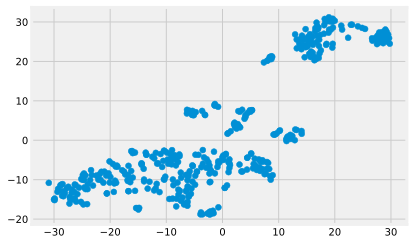

In [10]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

# Задание2

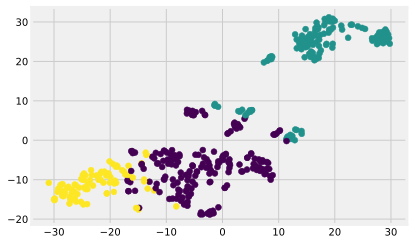

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [12]:
print('Средние значения price:')
for i in range(3):
    print(f'Кластер {i}: {y_train[labels_train == i].mean()}')
print('Средние значения CRIM:')
for i in range(3):
    print(f'Кластер {i}: {X_train.loc[labels_train == i, "CRIM"].mean()}')


Средние значения price:
Кластер 0: 24.971204188481675
Кластер 1: 16.1796875
Кластер 2: 27.87411764705882
Средние значения CRIM:
Кластер 0: 0.42098554973821994
Кластер 1: 10.7152190625
Кластер 2: 0.0721184705882353


# Задание3

In [13]:
labels_test = kmeans.predict(X_test_scaled)

In [14]:
print('Средние значения price:')
for i in range(3):
    print(f'Кластер {i}: {y_test[labels_test == i].mean()}')
print('Средние значения CRIM:')
for i in range(3):
    print(f'Кластер {i}: {X_test.loc[labels_test == i, "CRIM"].mean()}')

Средние значения price:
Кластер 0: 21.860784313725492
Кластер 1: 16.43714285714286
Кластер 2: 31.35
Средние значения CRIM:
Кластер 0: 0.2660788235294118
Кластер 1: 10.165531142857143
Кластер 2: 0.06206
